BÀI TẬP ĐẦU GIỜ

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter

# Đọc dữ liệu từ file
file_path = './data.xlsx'  # Thay bằng đường dẫn của bạn nếu cần
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Chuẩn bị dữ liệu
X = df.iloc[:, 1:5].values  # Các đặc trưng (Sepal/Petal length & width)
y = df['Species'].values    # Nhãn (Species)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hàm tính khoảng cách Euclidean
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Lớp k-Nearest Neighbors (k-NN)
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        """Lưu dữ liệu huấn luyện"""
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """Dự đoán nhãn cho tập kiểm tra"""
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        """Dự đoán nhãn cho một mẫu"""
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Chạy k-NN với k=23
knn = KNN(k=23)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Tính Accuracy và Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# In kết quả
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


CHI TIẾT

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
print(sys.version)

from sklearn import neighbors, datasets

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [4]:
from sklearn import datasets
import numpy as np

# Tải dữ liệu Iris
iris = datasets.load_iris()
iris_X = iris.data  # Dữ liệu đặc trưng
iris_y = iris.target  # Nhãn

# In số lượng lớp và số điểm dữ liệu
print(f'Number of classes: {len(np.unique(iris_y))}')
print(f'Number of data points: {len(iris_y)}')

# Lấy các mẫu từ mỗi lớp
X0 = iris_X[iris_y == 0, :]
print('\nSamples from class 0:\n', X0[:5, :])

X1 = iris_X[iris_y == 1, :]
print('\nSamples from class 1:\n', X1[:5, :])

X2 = iris_X[iris_y == 2, :]
print('\nSamples from class 2:\n', X2[:5, :])


Number of classes: 3
Number of data points: 150

Samples from class 0:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Samples from class 1:
 [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]

Samples from class 2:
 [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     iris_X, iris_y, test_size=50)

print ("Training size: %d" %len(y_train))
print ("Test size    : %d" %len(y_test))

Training size: 100
Test size    : 50


In [7]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Print results for first 20 test data points:")
print ("Predicted labels: ", y_pred[20:40])
print ("Ground truth    : ", y_test[20:40])

Print results for first 20 test data points:
Predicted labels:  [2 1 1 1 2 2 1 1 0 0 1 0 1 2 2 0 1 1 1 0]
Ground truth    :  [2 1 1 1 2 2 1 1 0 0 1 0 1 2 2 0 1 1 1 0]


In [8]:
from sklearn.metrics import accuracy_score
print ("Accuracy of 1NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 1NN: 92.00 %


In [9]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN with major voting: 98.00 %


In [10]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2, weights = 'distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Accuracy of 10NN (1/distance weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN (1/distance weights): 96.00 %


TÓM TẮT 

# 1. Introduction


This notebook explores various evaluation metrics commonly used in classification tasks, 
including accuracy, confusion matrix, precision, recall, and the ROC curve, 
with explanations of their significance and code examples.


# 2. Accuracy
Accuracy measures the proportion of correct predictions (both true positives and true negatives) 
out of all predictions made by the model. It is given by the formula:
Accuracy = (TP + TN) / (TP + TN + FP + FN)


#### 2.1 Example

In [16]:
from sklearn.metrics import accuracy_score

y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.80


# 3. Confusion Matrix

The confusion matrix is a 2x2 matrix for binary classification problems that shows 
the breakdown of actual versus predicted labels:
[TP, FP]
[FN, TN]


#### 3.1 examples

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[4 1]
 [1 4]]


# 4. True/False Positive/Negative

True Positive (TP) - Correctly predicted positive instances.
False Positive (FP) - Incorrectly predicted positive instances.
True Negative (TN) - Correctly predicted negative instances.
False Negative (FN) - Incorrectly predicted negative instances.

In [18]:
TP, FP, FN, TN = cm.ravel()
print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")

TP: 4, FP: 1, FN: 1, TN: 4


### 4.2 Receiver Operating Characteristic Curve

The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR).

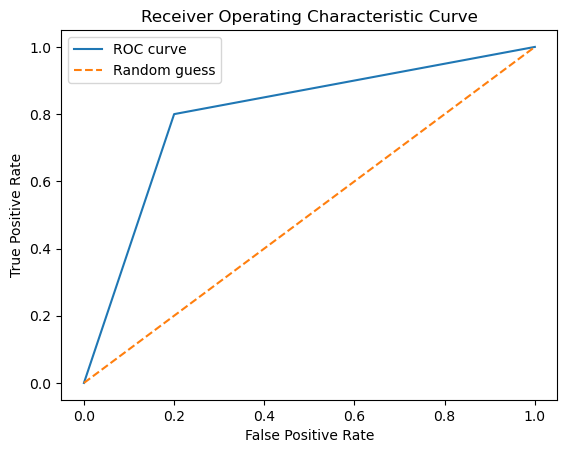

In [19]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

### 4.3 Area Under the Curve

The AUC (Area Under the Curve) gives the overall performance of the classification model.
A higher AUC indicates a better model.


In [20]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_true, y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")

ROC-AUC: 0.80


# 5. Precision and Recall

Precision: The proportion of true positive predictions out of all positive predictions.
Recall: The proportion of true positive predictions out of all actual positive instances.


In [21]:

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.80
Recall: 0.80



### 5.2 Precision-Recall Curve and Average Precision


A Precision-Recall curve plots precision against recall for different thresholds.


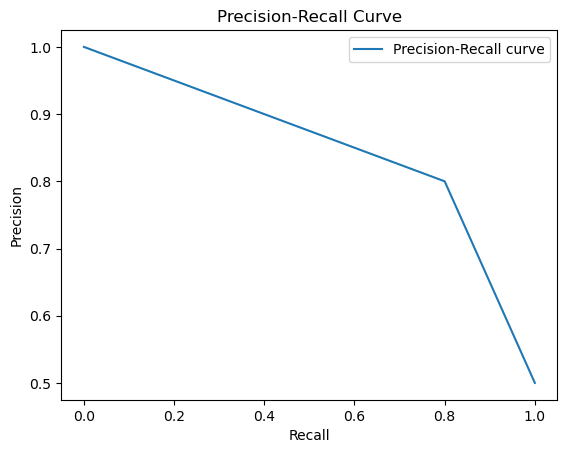

Average Precision: 0.74


In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred)
avg_precision = average_precision_score(y_true, y_pred)

plt.plot(recall_vals, precision_vals, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

print(f"Average Precision: {avg_precision:.2f}")

### 5.3 F1-Score


F1-score is the harmonic mean of precision and recall. 
It is a good metric when dealing with imbalanced classes.


In [25]:

from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.80


### 5.4 Precision-Recall for Multi-Class Classification

For multi-class classification, we use micro-average and macro-average approaches to calculate 
precision and recall.

In [24]:
from sklearn.metrics import precision_recall_fscore_support

y_true_multi = [0, 1, 2, 2, 1, 0, 1, 2, 0, 1]
y_pred_multi = [0, 1, 2, 0, 1, 0, 1, 2, 0, 2]

# Micro-average and Macro-average
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(
    y_true_multi, y_pred_multi, average='micro'
)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
    y_true_multi, y_pred_multi, average='macro'
)

print(f"Micro-average Precision: {precision_micro:.2f}, Recall: {recall_micro:.2f}, F1: {f1_micro:.2f}")
print(f"Macro-average Precision: {precision_macro:.2f}, Recall: {recall_macro:.2f}, F1: {f1_macro:.2f}")

Micro-average Precision: 0.80, Recall: 0.80, F1: 0.80
Macro-average Precision: 0.81, Recall: 0.81, F1: 0.79


# K-Nearest Neighbors Algorithm

KNN is a simple classification algorithm that predicts the class of a data point based on the majority vote of its nearest neighbors.
In this notebook, we'll apply KNN to the Iris dataset and discuss its components.



In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Load and Prepare the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

In [28]:

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# 3. Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# 4. Apply KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# 5. Make predictions and evaluate the model
y_pred = knn.predict(X_test)

In [32]:
# 6. Display results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



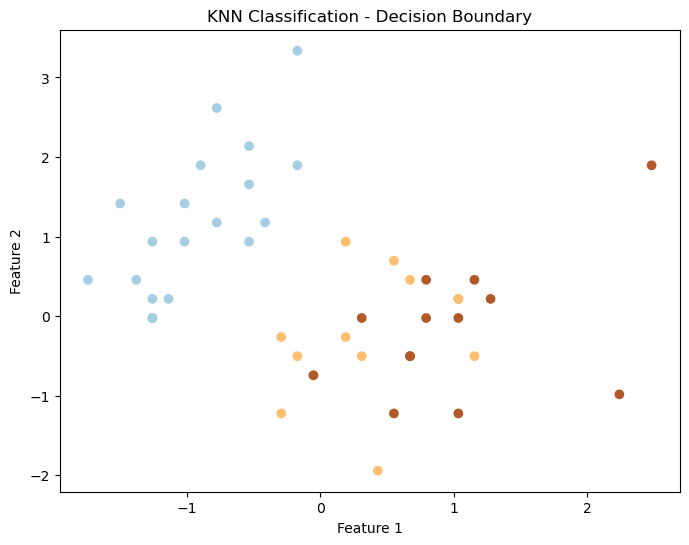

In [33]:
# 7. Visualize the decision boundary (Optional)
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.Paired)
plt.title('KNN Classification - Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()